<div style="background-color: #28a745 !important; color: white; min-height: 50px; padding: 10px; margin: auto;">
    <p style="text-align: right; font-style: italic">STMKGxHMGI Long Course</p>
    <h1>Basic Python for Seismology 2</h1>
</div>
<div style="background-color: whitesmoke; padding: 10px ">
    <ul>
        <li>Tujuan: Mengaplikasikan dasar Python dalam kasus sederhana</li>
        <li>Keluaran: Peserta mengaplikasikan pengetahuan dasar Python untuk pengolahan katalog sederhana</li>
        <li>Sesi: Praktek</li>
        <li>Waktu/Tempat: Sabtu, 18 September 2021/ Zoom Meeting</li>
    </ul>
</div>

## Membaca Data Tabular Menggunakan Pandas

Pada pertemuan di sesi kedua ini kita akan mulai bermain data dan mengaplikasikan beberapa-beberapa algoritma sederhana di Python untuk data tersebut. Data yang kita gunakan adalah katalog gempa Badan Meteorologi dan Geofisika (BMKG) pada kejadian gempa Mw 6.2 di Mamuju pada Januari lalu. Katalog gempa yang digunakan adalah dalam jangka waktu 11 Januari sampai 30 Januari 2021. Format data katalog berbentuk *Comma Separated Values* (CSV) dan sudah disesuaikan agar lebih mudah dibaca menggunakan Python. Peserta dapat mengunduh data ini dengan menekan [download data](data/demo_data_BMKG_Mamuju.csv) atau melalui [github](https://github.com/anangsahroni/geoscope-geohazard-workshop/blob/main/data/demo_data_BMKG_Mamuju.csv) kemudian taruh di dalam folder `data`. Format dari data ini adalah seperti berikut ini:


```
time,latitude,longitude,depth,magnitude
2021-01-27T18:43:24.965Z,-2.97,118.83,11,3.7
2021-01-25T16:04:16.363Z,-3.01,118.80,47,2.8
2021-01-24T20:52:08.070Z,-2.94,118.61,10,2.6
2021-01-24T16:52:55.221Z,-3.00,118.80,35,2.4
2021-01-24T02:38:50.171Z,-2.95,118.88,14,3.1
2021-01-21T11:55:35.955Z,-2.90,118.91,10,4.0
```

Pembacaan data untuk format CSV seperti di atas dapat dilakukan dengan berbagai macam cara seperti menggunakan fungsi bawaan seperti `open`, `numpy.genfromtxt`, atau menggunakan fungsi yang lebih *high level* atau mudah seperti `pandas.read_csv`. Pada praktik ini kita akan menggunakan cara yang paling mudah dan paling pendek yaitu menggunakan `pandas.read_csv` yang berada dalam modul `pandas`. Modul `pandas` memiliki spesialiasi manipulasi data dalam berbagai format, salah satunya yaitu format tabular seperti yang akan kita olah.

### Mengimpor Modul `pandas`

Seperti pada pertemuan pertama dimana kita harus mengimpor modul yang akan kita gunakan (`math`), kita juga akan mengimpor `pandas` dan kemudian memberikan alias panggilan `pd` agar untuk penulisan kode lebih mudah.

In [1]:
import pandas as pd

Cara pengimporan modul atau paket seperti di atas akan lazim kita temui dalam penulisan kode di Python, selain cara tersebut kita juga dapat langsung mengimpor fungsi yang akan kita gunakan, alih-alih mengimpor modul secara umum. Contoh yang terakhir akan kita berikan di pembahasan di bagian belakang.

### Membaca Data Menggunakan Fungsi `pandas.read_csv`
Fungsi dari `pandas` yang berguna untuk membaca data tabular dalam bentuk CSV adalah `pandas.read_csv` tetapi karena `pandas` sudah kita berikan alias `pd` maka kita cukup mengetikkan `pd.read_csv`. Sebelum kita menggunakan fungsi tersebut kita terlebih dahulu akan membaca petunjuk penggunaan fungsinya dengan menggunakan fungsi `help`:

In [ ]:
help(pd.read_csv)

Terdapat banyak sekali parameter yang harus kita isikan (atau kita biasa sebut sebagai argumen). Argumen-argumen yang diikuti tanda `=` dan isi parameternya (contoh `delimiter=None`) merupakan argumen yang sudah memiliki nilai *default*, dalam contoh ini untuk argumen `delimiter` apabila tidak kita isi maka secara otomatis akan terisi dengan nilai `None`. Dengan demikian, tidak semua argumen dalam sebuah fungsi harus kita isikan. Pada `pd.read_csv` ini sebenarnya fungsi akan mendeteksi secara otomatis delimiter (tanda pemisah kolom, dalam contoh kita yaitu koma (,)) yang ada di dalam data yang akan dibaca. Saatnya kita membaca data:

In [3]:
data = pd.read_csv("data/demo_data_BMKG_Mamuju.csv")

Pada contoh kode pembacaan di atas ini kita hanya mengisikan satu argumen yaitu data yang akan kita gunakan (dalam bentuk `String` karena merupakan kumpulan karakter non angka). Argumen-argumen lain kita tidak isikan karena fungsi ini secara otomatis akan mendeteksi format data yang kita gunakan, dengan catatan data kita sudah rapi dan bersih. Untuk melihat data yang sudah kita baca kita dapat memanggilnya dengan menulis `data` seperti pada kode di bawah ini.

In [4]:
data.head()

,time,latitude,longitude,depth,magnitude
0,2021-01-27T18:43:24.965Z,-2.97,118.83,11,3.7
1,2021-01-25T16:04:16.363Z,-3.01,118.80,47,2.8
2,2021-01-24T20:52:08.070Z,-2.94,118.61,10,2.6
3,2021-01-24T16:52:55.221Z,-3.00,118.80,35,2.4
4,2021-01-24T02:38:50.171Z,-2.95,118.88,14,3.1


Seperti yang sudah kita bahas diawal, `pd.read_csv` akan secara otomatis mendeteksi format data yang kita baca. Saat data kita panggil dengan perintah `data` maka akan muncul tabel seperti di atas. Kita dapat mengecek apakah data sudah terbaca dengan baik, pada contoh di atas data terbaca dengan baik karena masing-masing kolom terpisahkan dengan benar. Bagaimana dengan contoh pembacaan yang masih salah?

In [5]:
data_salah = pd.read_csv("./demo_data_BMKG_MamujuEQ.csv", delimiter=".")
data_salah.head()

FileNotFoundError: [Errno 2] No such file or directory: './demo_data_BMKG_MamujuEQ.csv'

Pada contoh pembacaan yang salah pada kode diatas, kita memasukkan nilai untuk argumen `delimiter` yaitu berupa tanda titik `.`, padahal pemisah antar kolom pada file CSV kita berupa tanda koma (,). Hal tersebut membuat pemisahan antar kolom tidak benar.

## Membedakan Jenis Data pada Kolom Data Katalog

Setelah berhasil membaca data, langkah selanjutnya adalah melihat beberapa tipe-tipe data pada masing-masing kolom untuk mengingatkan kembali pengetahuan kita tentang `String`, `Float`, dan `Integer`. Pada data yang dibaca menggunakan `pd.read_csv`, tabel secara umum memiliki format tersendiri yaitu `DataFrame`, format yang dibuat oleh `pandas`.

In [ ]:
help(data)

Masing-masing kolom sendiri memiliki jenis data yang beragam tergantung dengan isi dari setiap kolom tersebut. Pada contoh yang pertama kita akan melihat jenis data yang ada dalam kolom `longitude`. Memanggil salah satu kolom dalam pandas cukup mudah yaitu kita hanya perlu menuliskan `data` kemudian diikuti dengan `[namakolom]`, maka untuk kolom `longitude` kita dapat melihat tipe datanya dengan:

In [7]:
data['longitude'].dtype

dtype('float64')

Kolom `longitude` ternyata data di dalamnya memiliki format data `Float` karena merupakan bilangan yang tidak bulat atau desimal. Apabila ingin melihat data dalam kolom ini kita dapat menuliskan kode:

In [8]:
data['longitude']

0     118.83
1     118.80
2     118.61
3     118.80
4     118.88
5     118.91
6     118.86
7     119.50
8     118.88
9     118.88
10    118.91
11    119.03
12    118.94
13    118.94
14    118.84
15    118.86
16    118.92
17    118.95
18    118.92
19    118.88
20    118.93
21    118.84
22    118.85
23    118.91
24    119.01
25    118.94
26    118.93
27    118.93
28    118.91
29    118.94
30    118.89
31    118.88
32    118.95
33    118.94
34    118.90
35    118.90
36    118.88
37    118.88
38    118.93
39    118.89
40    118.92
41    119.48
Name: longitude, dtype: float64

Format data yang berbeda kita temui pada kolom `depth` dimana semua data pada kolom ini berupa bilangan bulat sehingga tipe datanya seharusnya `Integer`.

In [9]:
data['depth'].dtype

dtype('int64')

Bagaimana dengan kolom `time`? Apakah tipe data pada kolom ini akan berupa `String`?

In [10]:
data['time'].dtype

dtype('O')

Ternyata pada kolom `time` tipe datanya adalah `Object` yang disingkat `O`, tipe ini merupakan kita yang lebih lanjut karena dapat berupa jenis data apapun, terkecuali `Integer` dan `Float`, dalam contoh ini.

## Mempelajari Data Bertipe `list` dan `tuple`

### List
Apabila kita sudah dapat membedakan jenis data untuk nilai yang berupa satuan (tidak berupa kumpulan nilai) yaitu seperti `String`, `Float`, dan `Integer`. Bagaimana dengan jenis atau tipe data yang merupakan kumpulan-kumpulan angka atau huruf? Seperti contoh pada data di bawah ini:

```python
deret = [1,2,3,4,5]
alamat = ["Yogyakarta", "Semarang", "Ambon", "Padang"]
```

Pada `deret` kita tahu bahwa isinya merupakan kumpulan dari `Integer` dan pada `alamat` isinya merupakan kumpulan `String` tetapi untuk `deret` dan `alamat` secara utuh sendiri dapat kita dapat sebut sebagai apa? Kumpulan-kumpulan data dalam bentuk daftar satu dimensi seperti pada contoh `deret` dan `alamat` tersebut biasa kita sebut sebagai data berjenis `List`, atau secara matematika, fisika, ataupun ilmu komputer juga dapat kita sebut sebagai sebuah vektor, karena vektor pun bentuknya biasanya diwakili dari kumpulan angka-angka dalam satu baris seperti di atas.

Setiap kolom dari data yang sebelumnya kita baca menggunakan `pd.read_csv` merupakan salah satu bentuk `List` karena berupa deretan angka dalam 1 dimensi saja atau 1 baris saja. Untuk membaca kolom kedalam bentuk `List` kita dapat menggunakan fungsi bawaan dari Python yaitu `list`:

In [11]:
longitude = list(data['longitude'])
longitude

[118.83,
 118.8,
 118.61,
 118.8,
 118.88,
 118.91,
 118.86,
 119.5,
 118.88,
 118.88,
 118.91,
 119.03,
 118.94,
 118.94,
 118.84,
 118.86,
 118.92,
 118.95,
 118.92,
 118.88,
 118.93,
 118.84,
 118.85,
 118.91,
 119.01,
 118.94,
 118.93,
 118.93,
 118.91,
 118.94,
 118.89,
 118.88,
 118.95,
 118.94,
 118.9,
 118.9,
 118.88,
 118.88,
 118.93,
 118.89,
 118.92,
 119.48]

Ada metode yang dapat diaplikasikan untuk data berjenis`List` ini, yang paling sederhana adalah fungsi `len` untuk mengetahui panjang dari `List`:

In [12]:
len(longitude)

42

#### Indeks pada `List`
Data berjenis `List` diindeks dengan indeks awalan adalah 0 sehingga apabila akan memanggil data pertama dalam `List` longitude kita dapat menggunakan:

In [13]:
longitude[0]

118.83

Sehingga untuk data terakhir pada `List` `longitude` kita dapat memanggilnya dengan

In [14]:
longitude[41]

119.48

Karena diindeks dari 0 sehingga data terakhir berada pada indeks 41. Agar tidak bingung, Python memberikan alternatif apabila kita ingin memanggil data dari bagian belakang, yaitu dengan menambahakan simbol negatif (-) seperti pada contoh ini:

In [15]:
longitude[-1]

119.48

Berbeda dengan indeks dari bagian awal yang dimulai dari 0, pada indeks dari akhir kita mulai dengan -1. Untuk mengecek apakah `longitude[41]` dan `longitude[-1]` sama kita dapat menggunakan:

In [16]:
longitude[41] == longitude[-1]

True

Hasilnya akan `True` karena nilai keduanya sama, contoh yang lain:

In [17]:
longitude[40] == longitude[-2]

True

Hasilnya juga akan `True`.

#### *Slicing* pada `List`
Bagaimana bila yang akan kita panggil datanya berjumlah lebih dari satu? Misalkan kita akan mengambil 4 data pertama:

In [18]:
longitude_empat_awal = longitude[0:4]
longitude_empat_awal

[118.83, 118.8, 118.61, 118.8]

Metode di atas sering kita kenal nanti sebagai metode `slicing`, metode ini juga berlaku untuk indeks yang dari belakang:

In [19]:
longitude_tiga_akhir = longitude[-4:-1]
longitude_tiga_akhir

[118.93, 118.89, 118.92]

#### Mengedit `List`

Kita dapat menghapus, menambah, atau mengedit isi dari `List` yang kita punya, pada contoh mengedit `List` ini kita akan menggunakan `List` baru yang lebih pendek dan sederhana jadi untuk `List` dan data gempa kita simpan dan tidak ubah-ubah. Kasus ini adalah pendaftaran peserta untuk mengikuti workshop:

In [20]:
daftar_peserta = ["Budi", "Joni", "Putri", "Indah", "Ade", "Rahma"]

Ternyata ada peserta yang mendaftar terlambat yaitu Ari, untuk memasukkan Ari ke daftar peserta kita dapat menggunakan metode `append`.

In [21]:
daftar_peserta.append("Ari")
daftar_peserta

['Budi', 'Joni', 'Putri', 'Indah', 'Ade', 'Rahma', 'Ari']

Ari sudah masuk menjadi peserta, walaupun datangnya terlambat sehingga dia duduk di indeks paling terakhir karena metode `append`. Ternyata ada lagi peserta yang belum tercatat yaitu Dina, karena Dina ternyata sudah mendaftar pertama kali tetapi lupa tercatat, panitia kemudian memasukkan Dina ke bangku nomor satu dengan metode `insert` pada indeks 0: 

In [22]:
daftar_peserta.insert(0,"Dina")
daftar_peserta

['Dina', 'Budi', 'Joni', 'Putri', 'Indah', 'Ade', 'Rahma', 'Ari']

Workshop kemudian selesai dan dilanjutkan dengan ujian, Joni ternyata yang paling cepat sehingga dia keluar kelas workshop terlebih dahulu. Untuk menghapus Joni dari daftar peserta:

In [23]:
daftar_peserta.remove("Joni")
daftar_peserta

['Dina', 'Budi', 'Putri', 'Indah', 'Ade', 'Rahma', 'Ari']

Bagaimana apabila mengganti langsung menggunakan indeks? Karena ternyata nama Budi bukan Budi tetapi Rudi:

In [24]:
daftar_peserta[1] = "Rudi"
daftar_peserta

['Dina', 'Rudi', 'Putri', 'Indah', 'Ade', 'Rahma', 'Ari']

Masih banyak metode `List` lain yang dapat kita gunakan, secara lebih lengkap dapat dibuka di `help(list)`

In [25]:
help(list)

Help on class list in module builtins:

class list(object)
 |  list(iterable=(), /)
 |  
 |  Built-in mutable sequence.
 |  
 |  If no argument is given, the constructor creates a new empty list.
 |  The argument must be an iterable if specified.
 |  
 |  Methods defined here:
 |  
 |  __add__(self, value, /)
 |      Return self+value.
 |  
 |  __contains__(self, key, /)
 |      Return key in self.
 |  
 |  __delitem__(self, key, /)
 |      Delete self[key].
 |  
 |  __eq__(self, value, /)
 |      Return self==value.
 |  
 |  __ge__(self, value, /)
 |      Return self>=value.
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __getitem__(...)
 |      x.__getitem__(y) <==> x[y]
 |  
 |  __gt__(self, value, /)
 |      Return self>value.
 |  
 |  __iadd__(self, value, /)
 |      Implement self+=value.
 |  
 |  __imul__(self, value, /)
 |      Implement self*=value.
 |  
 |  __init__(self, /, *args, **kwargs)
 |      Initialize self.  See help(type(self))

### Tuple

`Tuple` secara sederhana mirip sekali dengan `List` hanya saja penulisan menggunakan `()`, bukan `[]`, metode-metodenya hampir sama, hanya saja untuk `Tuple` ini data di dalamnya tidak dapat kita edit:

In [26]:
daftar_nilai = (10,9,10,8,7,8)

Kita tidak bisa menambahkan nilai ke dalam sebuah `Tuple`:

In [27]:
daftar_nilai.append(10)

AttributeError: 'tuple' object has no attribute 'append'

Begitupula mengedit nilai yang ada dalam `Tuple` tersebut:

In [28]:
daftar_nilai[1]=10

TypeError: 'tuple' object does not support item assignment

Fun fact: `String` memiliki sifat `Tuple`

In [29]:
nama = "Rudi"
nama[0]

'R'

In [30]:
nama.append("s")

AttributeError: 'str' object has no attribute 'append'

In [31]:
nama[0] = "B"

TypeError: 'str' object does not support item assignment

## *Looping*

Proses *looping* merupakan proses mengulang-ngulang sebuah proses sampai kondisi tertentu tercapai. Pada Python terdapat dua jenis *looping* yaitu `for` dan `while`. `for` akan melakukan *looping* dengan sampai pada batas jumlah *looping* atau sampai pada syarat tertentu yang sudah tercapai sedangkan `while` akan terus berjalan saat syaratnya masih terpenuhi. Sebelum kita menggunakan `for` untuk mengkonversi `String` pada kolom `time` menjadi data berjenis `datetime.datetime`, kita bermain dengan `list` yang lebih sederhana dahulu:

In [32]:
for peserta in daftar_peserta:
    print("Nama: ", peserta)

Nama:  Dina
Nama:  Rudi
Nama:  Putri
Nama:  Indah
Nama:  Ade
Nama:  Rahma
Nama:  Ari


Pada contoh di atas, kita dapat membaca kode seperti ini: untuk setiap peserta di daftar peserta, kita cetak nama peserta didahului dengan tulisan "Nama: ", looping akan berjalan mulai dari Dina, sehingga tulisan "Nama: Dina" akan tercetak pertama kali, dilanjutkan dengan Rudi, dan yang terakhir adalah Ari.

In [33]:
for peserta in daftar_peserta:
    print(peserta, " lulus")

Dina  lulus
Rudi  lulus
Putri  lulus
Indah  lulus
Ade  lulus
Rahma  lulus
Ari  lulus


Kita juga dapat bermain dengan `List` yang berisi angka, misalnya pada contoh ini kita akan menambahkan setiap nilai pada daftar nilai dengan 1:

In [34]:
print("Nilai= ", daftar_nilai)

for nilai in daftar_nilai:
    print("nilai+1= ",nilai+1)

Nilai=  (10, 9, 10, 8, 7, 8)
nilai+1=  11
nilai+1=  10
nilai+1=  11
nilai+1=  9
nilai+1=  8
nilai+1=  9


Contoh di bawah ini kita memanfaatkan metode `append` untuk membuat daftar nilai baru yang sudah ditambah dengan 1. Karena `for` loop mengevaluasi setiap `nilai` dalam `daftar_nilai` maka untuk setiap `nilai`, `daftar_nilai_tambah_satu` akan di`append` dengan `nilai+1`, sehingga hasilnya adalah `List` baru yang isinya nilai awal ditambah satu:

In [35]:
daftar_nilai_tambah_satu = []
for nilai in daftar_nilai:
    daftar_nilai_tambah_satu.append(nilai+1)
    
print("Nilai asli= ", daftar_nilai)
print("Nilai+1 = ", daftar_nilai_tambah_satu)

Nilai asli=  (10, 9, 10, 8, 7, 8)
Nilai+1 =  [11, 10, 11, 9, 8, 9]


Kita kembali ke data katalog gempabumi yang sudah kita baca menggunakan `pd.read_csv` tadi. Pada `data` kita mendapatkan satu kolom yang menunjukkan waktu yaitu kolom `time`, saat kita lihat tipe datanya tadi kolom ini masih berupa `Object` secara umum, dan mengarah ke jenis data `String`. Python memiliki jenis data khusus untuk menunjukkan waktu yaitu salah satunya adalah `datetime.datetime`. Dengan demikian kolom `time` harus kita konversi ke dalam tipe `datetime.datetime`. Proses konversi ini dapat dilakukan menggunakan modul `datetime` yang merupakan bawaan dari Python. 

In [36]:
list_time = list(data['time'])
time_pertama = list_time[0]
print("time_pertama", time_pertama)
print("tipe data",type(time_pertama))

time_pertama 2021-01-27T18:43:24.965Z
tipe data <class 'str'>


Kita dapatkan hasil bahwa untuk waktu pertama tipe datanya adalah masih berupa `String` yang ditunjukkan dengan tulisan `String`. Agar data waktu dapat diolah kita dapat mengubah ke format `datetime.datetime` dengan:

```python
datetime.datetime.strptime()
```

Sebelumnya kita lihat dulu fungsi `help` untuk `datetime.datetime.strptime()`:

In [37]:
import datetime
help(datetime.datetime.strptime)

Help on built-in function strptime:

strptime(...) method of builtins.type instance
    string, format -> new datetime parsed from a string (like time.strptime()).



Ternyata fungsi ini merupakan turunan dari `time.strptime` sehingga untuk melihat petunjukanya kita dapat menggunakan:

In [38]:
import time
help(time.strptime)

Help on built-in function strptime in module time:

strptime(...)
    strptime(string, format) -> struct_time
    
    Parse a string to a time tuple according to a format specification.
    See the library reference manual for formatting codes (same as
    strftime()).
    
    Commonly used format codes:
    
    %Y  Year with century as a decimal number.
    %m  Month as a decimal number [01,12].
    %d  Day of the month as a decimal number [01,31].
    %H  Hour (24-hour clock) as a decimal number [00,23].
    %M  Minute as a decimal number [00,59].
    %S  Second as a decimal number [00,61].
    %z  Time zone offset from UTC.
    %a  Locale's abbreviated weekday name.
    %A  Locale's full weekday name.
    %b  Locale's abbreviated month name.
    %B  Locale's full month name.
    %c  Locale's appropriate date and time representation.
    %I  Hour (12-hour clock) as a decimal number [01,12].
    %p  Locale's equivalent of either AM or PM.
    
    Other codes may be available on yo

Berdasarkan petunjuk di atas kita harus memasukkan `String` kita yaitu `time_pertama` sebagai argumen pertama kemudian diikuti format dari penulisan waktu kita. Waktu kita ditulis dengan menggunakan `2021-01-27T18:43:24.965Z` sehingga menurut pentujuk di atas kita akan menuliskan format `'%Y-%m-%dT%H:%M:%S.%fZ'` sehingga kode untuk konversi menjadi:

In [39]:
time_pertama_dt = datetime.datetime.strptime(time_pertama, '%Y-%m-%dT%H:%M:%S.%fZ')

In [40]:
print("time_pertama", time_pertama)
print("time_pertama_dt", time_pertama_dt)

time_pertama 2021-01-27T18:43:24.965Z
time_pertama_dt 2021-01-27 18:43:24.965000


Dari hasil di atas sekilas nampak sama, mari kita lihat tipe masing-masing, baik yang sebelum dikonversi dengan yang sudah dikonversi:

In [41]:
print("tipe data time_pertama", type(time_pertama))
print("tipe data time_pertama_dt", type(time_pertama_dt))

tipe data time_pertama <class 'str'>
tipe data time_pertama_dt <class 'datetime.datetime'>


Dengan fungsi `type` dapat dilihat dengan jelas bahwa untuk format yang sudah dikonversi berubah menjadi `datetime.datetime` sesuai dengan salah satu standar format data berjenis waktu pada Python.

Selanjutnya kita akan mengaplikasikan `for` loop untuk mengonversi semua data dalam `List` `list_time` agar tidak perlu melakukannya satu per satu.

In [42]:
list_time_dalam_datetime = []
for time in list_time:
    time_terkonversi = datetime.datetime.strptime(time, '%Y-%m-%dT%H:%M:%S.%fZ')
    list_time_dalam_datetime.append(time_terkonversi)

**Looping** di atas di awali dengan membuat `List` kosong yang nantinya akan diisi dengan waktu yang sudah dikonversi menjadi format `datetime.datetime`. Proses looping pertama yaitu untuk data pertama pada `list_time`, data ini kemudian akan dikonversi menggunakan fungsi `datetime.datetime.strptime` yang tadi sudah kita coba untuk waktu pertama. Setelah dikonversi, waktu terkonversi akan dimasukkan ke dalam `List` `list_time_dalam_datetime` menggunakan metode `append`. Proses konversi dan `append` ini diulang sampai semua data pada `list_time` terkonversi dan masuk dalam `list_time_dalam_datetime`. Pengecekean kita lakukan dengan memanggil `list_time_dalam_datetime`.

In [43]:
list_time_dalam_datetime[:5]

[datetime.datetime(2021, 1, 27, 18, 43, 24, 965000),
 datetime.datetime(2021, 1, 25, 16, 4, 16, 363000),
 datetime.datetime(2021, 1, 24, 20, 52, 8, 70000),
 datetime.datetime(2021, 1, 24, 16, 52, 55, 221000),
 datetime.datetime(2021, 1, 24, 2, 38, 50, 171000)]

List di atas semua anggotanya sudah dalam bentuk `datetime.datetime`.

Setelah terkonversi kita sudah dapat menggunakan kolom waktu ini untuk analisisnya, contohnya untuk mengeplot setiap waktu kejadiandan berapa magnitudonya, plot ini hanya preview dan akan dijelaskan di bagian belakang secara lebih mendetail:

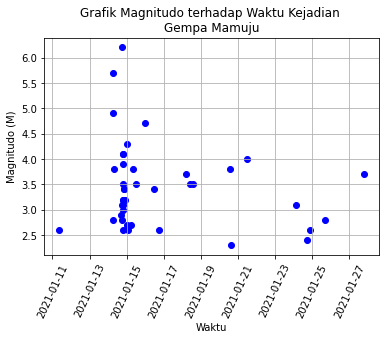

In [44]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# mendefinisikan list waktu dan magnitudo
waktu = list_time_dalam_datetime
magnitudo = list(data['magnitude'])

# membuat plot
fig, ax = plt.subplots()
ax.scatter(waktu, magnitudo, color="blue")
ax.set_title("Grafik Magnitudo terhadap Waktu Kejadian \nGempa Mamuju")
ax.set_xlabel("Waktu")
ax.set_ylabel("Magnitudo (M)")
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
plt.xticks(rotation=65)
plt.grid()


Bandingkan dengan plot **SALAH** di bawah ini, karena `String` pada waktu belum dikonversi ke dalam `datetime.datetime`.

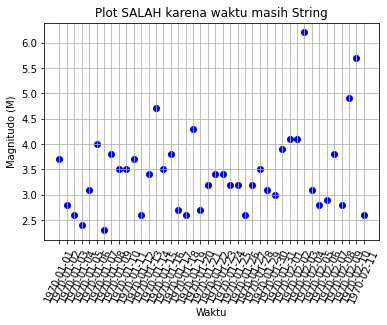

In [45]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

waktu = list_time
magnitudo = list(data['magnitude'])

fig, ax = plt.subplots()
ax.scatter(waktu, magnitudo, color="blue")
ax.set_title("Plot SALAH karena waktu masih String")
ax.set_xlabel("Waktu")
ax.set_ylabel("Magnitudo (M)")
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
plt.xticks(rotation=65)
plt.grid()


## *Conditional*

*Conditional* merupakan susunan dari pernyataan-pernyataan jika yang digunakan untuk menentukan keputusan/*decision making*. Pada Python algoritma *conditional* biasanya dituliskan menggunakan `if` untuk level pertama, dilanjutkan `elif` untuk level berikutnya, dan untuk level terakhir menggunakankan pernyataan `else`. Mungkin akan lebih mudah apabila dijelaskan dalam bentuk kode:

In [49]:
nilai = float(input("Masukkan angka nilai anda: "))

if nilai < 50:
    print("Nilai anda", "D")
elif nilai <60:
    print("Nilai anda", "C")
elif nilai <70:
    print("Nilai anda", "B")
else:
    print("Nilai anda", "A")

Masukkan angka nilai anda: 55
Nilai anda C


Pada contoh di atas apabila kita memasukkan nilai 55 maka yang pertama kali dicek adalah kondisional paling atas yaitu `if nilai <50`, karena nilai lebih besar daripada 50 maka ekspresi akan dilanjutkan ke kondisional kedua yaitu `elif nilai <60`, dimana pada fase kedua ini sudah cocok karena nilai 55 berada di bawah 60 sehingga akan keluar `Nilai anda C`. Contoh dibawah ini adalah untuk kasus nilai 45: 

In [50]:
nilai = float(input("Masukkan angka nilai anda: "))

if nilai < 50:
    print("Nilai anda", "D")
elif nilai <60:
    print("Nilai anda", "C")
elif nilai <70:
    print("Nilai anda", "B")
else:
    print("Nilai anda", "A")

Masukkan angka nilai anda: 45
Nilai anda D


Pada nilai 45 proses sudah langsung terhenti di level 1 (`if nilai < 50`) sehingga proses akan selesai dan keluar hasil cetakan berupa `Nilai anda D`. Kondisional ini dapat berlevel dan dapat pula menggunakan ekspresi `and` untuk "dan" dan `or` untuk `atau`. Seperti contoh di bawah ini:

In [51]:
nilai = float(input("Masukkan angka nilai anda: "))

if nilai>50 and nilai <70:
    print("Nilai anda berada di antara 50 dan 70")
elif nilai<50 or nilai>70:
    print("Nilai anda bisa jadi lebih rendah dari 50\
    atau lebih tinggi dari 70")

Masukkan angka nilai anda: 60
Nilai anda berada di antara 50 dan 70


Pada contoh di atas apabila kita memasukkan nilai 60, Python akan mencetak `Nilai anda berada di antara 50 dan 70` karena angka 60 lebih besar dari 50 (`nilai>50`) dan (`and`) lebih rendah dari 70 (`nilai<70`). Berbeda apabila kita memasukkan angka 45, apa yang akan terjadi?

### Memfilter data Katalog Menggunakan *Conditional*

*Conditional* akan kita gunakan untuk memfilter katalog berdasarkan beberapa syarat, seperti syarat waktu kejadian, syarat kedalaman, syarat magnitudo, ataupun syarat lokasi horizontal. Sebelum melakukan filter data katalog, kita akan mengumpulkan terlebih dahulu kolom-kolom data katalog kita.

In [52]:
kolom_waktu = list_time_dalam_datetime
kolom_latitude = list(data['latitude'])
kolom_longitude = list(data['longitude'])
kolom_kedalaman = list(data['depth'])
kolom_magnitudo = list(data['magnitude'])

Kolom-kolom yang sudah kitakumpulkan akan kita satukan dalam bentuk data baru yaitu `dictionary`. `dictionary` merupakan kumpulan data dengan masing-masing pasangan `key` dan `value`, jika diibaratkan dengan sebuah tabel maka `key` adalah judul kolom dan `value` adalah isi dari kolom tersebut. `dictionary` ini akan kita gunakan untuk menggabungkan kembali kolom-kolom yang sudah terpisah. Pembuatan `dictionary` dalam Python ada beberap cara, pada cara ini kita akan menggunakan fungsi `dict`.

In [53]:
katalog_dict = dict(waktu=kolom_waktu,
                    latitude=kolom_latitude,
                    longitude=kolom_longitude,
                    kedalaman=kolom_kedalaman,
                    magnitudo=kolom_magnitudo)

katalog_dict

{'waktu': [datetime.datetime(2021, 1, 27, 18, 43, 24, 965000),
  datetime.datetime(2021, 1, 25, 16, 4, 16, 363000),
  datetime.datetime(2021, 1, 24, 20, 52, 8, 70000),
  datetime.datetime(2021, 1, 24, 16, 52, 55, 221000),
  datetime.datetime(2021, 1, 24, 2, 38, 50, 171000),
  datetime.datetime(2021, 1, 21, 11, 55, 35, 955000),
  datetime.datetime(2021, 1, 20, 14, 43, 48, 536000),
  datetime.datetime(2021, 1, 20, 14, 19, 28, 193000),
  datetime.datetime(2021, 1, 18, 13, 51, 39, 482000),
  datetime.datetime(2021, 1, 18, 9, 29, 21, 771000),
  datetime.datetime(2021, 1, 18, 4, 11, 17, 114000),
  datetime.datetime(2021, 1, 16, 17, 42, 58, 908000),
  datetime.datetime(2021, 1, 16, 10, 45, 50, 793000),
  datetime.datetime(2021, 1, 15, 23, 32, 53, 689000),
  datetime.datetime(2021, 1, 15, 12, 28, 53, 297000),
  datetime.datetime(2021, 1, 15, 7, 40, 49, 939000),
  datetime.datetime(2021, 1, 15, 5, 34, 38, 593000),
  datetime.datetime(2021, 1, 15, 1, 7, 50, 643000),
  datetime.datetime(2021, 1, 

Pada fungsi `dict` di atas kita memberikan masing-masing judul kolom yang kemudian diikuti nilai-nilai untuk kolom tersebut. Salah satu contohnya yaitu untuk judul `waktu` diikuti dengan `kolom_waktu`. Kolom-kolom yang sebelumnya terpisah dan dalam bentuk struktur data `List` kini sudah tergabung dalam satu kesatuan berbentuk `dictionary`. Untuk mengakses kolom pada `dictionary` kita dapat menggunakan cara yang sama ketika mengakses kolom pada `DataFrame` hasil pembacaan `pandas`. Hanya saja pada `dictionary` ini hasil pembacaan kolom akan langsung berbentuk `List`, tanpa dikonversi dengan fungsi `list`.

In [54]:
katalog_dict['waktu'][:5]

[datetime.datetime(2021, 1, 27, 18, 43, 24, 965000),
 datetime.datetime(2021, 1, 25, 16, 4, 16, 363000),
 datetime.datetime(2021, 1, 24, 20, 52, 8, 70000),
 datetime.datetime(2021, 1, 24, 16, 52, 55, 221000),
 datetime.datetime(2021, 1, 24, 2, 38, 50, 171000)]

In [55]:
katalog_dict.keys()

dict_keys(['waktu', 'latitude', 'longitude', 'kedalaman', 'magnitudo'])

Pada contoh di bawah ini kita akan memisahkan lagi `dictionary` menjadi kolom-kolom kemudian memanfaatkan `zip` untuk melakukan *looping* for secara paralel untuk semua kolom data katalog kita.

In [56]:
tanggal_awal = datetime.datetime(2021,1,14) # 12 Januari 2021
tanggal_akhir = datetime.datetime(2021,1,15) # 14 Januari 2021

#katalog hasil_filter
waktu_hasil_filter = []
longitude_hasil_filter = []
latitude_hasil_filter = []
kedalaman_hasil_filter = []
magnitudo_hasil_filter = []


# memisah masing-masing kolom lagi
waktu = katalog_dict['waktu']
latitude = katalog_dict['latitude']
longitude = katalog_dict['longitude']
kedalaman = katalog_dict['kedalaman']
magnitudo = katalog_dict['magnitudo']

# mengumpulkan kolom menjadi satu `zip`
katalog = zip(waktu, latitude, longitude, kedalaman, magnitudo)

for t,lat,lon,ked,mag in katalog:
    # jika waktu lebih dari tanggal awal dan kurang dari tanggal akhir
    if t>tanggal_awal and t<tanggal_akhir:
        waktu_hasil_filter.append(t)
        longitude_hasil_filter.append(lon)
        latitude_hasil_filter.append(lat)
        kedalaman_hasil_filter.append(ked)
        magnitudo_hasil_filter.append(mag)
        

Jumlah data awal dibandingkan dengan data hasil filter adalah:

In [57]:
print("Semua data",len(waktu))
print("Data hasil_filter",len(waktu_hasil_filter))

Semua data 42
Data hasil_filter 21


Untuk memberikan gambaran hasil filter kita akan mengeplotkan katalog asli dengan katalog yang sudah difilter kita akan mengeplotnya.

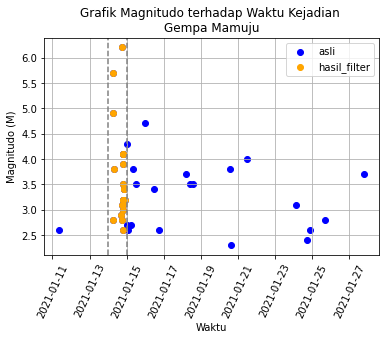

In [58]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# mendefinisikan list waktu dan magnitudo
waktu_hasil_filter = waktu_hasil_filter
magnitudo_hasil_filter = magnitudo_hasil_filter

# membuat plot
fig, ax = plt.subplots()
ax.scatter(waktu, magnitudo, color="blue", label="asli")
ax.scatter(waktu_hasil_filter, magnitudo_hasil_filter, color="orange", label="hasil_filter")
ax.set_title("Grafik Magnitudo terhadap Waktu Kejadian \nGempa Mamuju")
ax.set_xlabel("Waktu")
ax.set_ylabel("Magnitudo (M)")
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
ax.axvline(x=tanggal_awal, linestyle="--", color="grey")
ax.axvline(x=tanggal_akhir, linestyle="--", color="grey")
plt.xticks(rotation=65)
plt.legend()
plt.grid()


## Fungsi dan Modul

Fungsi merupakan kumpulan kode dengan tujuan tertentu yang dapat dipanggil saat akan digunakan. Kode dalam sebuah fungsi akan disesuaikan dengan tujuan dibuatnya fungsi tersebut. Fungsi-fungsi dipecah menjadi bagian-bagian kecil untuk mempermudah penulisan kode, pemanggilan, *debugging*, dan *maintenance*, kebiasaan ini sering disebut sebagai *refactoring*. berikut ini adalah contoh fungsi dengan tujuan spesifik yaitu untuk menghitung volume kubus.

In [59]:
def volume_kubus(panjang_sisi):
    """Fungsi untuk menghitung volume kubus
    
    Parameters:
    panjang_sisi : float
        Panjang sisi kubus
        
    Returns:
    volume : float
        Volume kubus
    """
    volume = float(panjang_sisi)**3
    return volume

Penulisan fungsi diawali dengan sintaks `def` yang diikuti dengan nama fungsi, setelah nama fungsi kemudian ada `argument` didalam tanda kurung yang harus kita isikan nilainya ketika memanggil fungsi tersebut. Perhitungan kemudian diletakkan di baris bawah pendefinisian fungsi dengan diberikan satu kali indentasi. Di akhir setiap fungsi biasanya akan ada sintaks `return` yang diikuti variabel apa yang akan dikembalikan atau dihasilkan dari menjalankan fungsi tersebut. Tidak semua fungsi harus mengembalikan sebuah hasil. 

Pada fungsi volume kubus di atas nama fungsinya adalah `volume_kubus` dengan parameter atau argumen yang harus diisi adalah `panjang_sisi`. `volume` kemudian akan dihitung dengan menggunakan rumus `float(panjang_sisi)**3` sebelum akhrinya dikembalikan atau dikeluarkan hasilnya oleh `return`. Fungsi di atas menjadi terlihat begitu panjang karena terdapat `docstring` yang diapit oleh `'''` yang merupakan manual penggunaan fungsi tersebut. `docstring` atau string dokumentasi ini berguna sebagai petunjuk bagi pengguna serta penulis kode, apabila akan melakukan *maintenance* atau update. `docstring` yang ditunjukkan disini adalah `docstring` dengan format penulisan mengikuti gaya `numpy`. Dengan adanya `docstring` maka kita dapat memanggil fungsi `help` yang akan menunjukkan `docstring` tersebut.

In [60]:
help(volume_kubus)

Help on function volume_kubus in module __main__:

volume_kubus(panjang_sisi)
    Fungsi untuk menghitung volume kubus
    
    Parameters:
    panjang_sisi : float
        Panjang sisi kubus
        
    Returns:
    volume : float
        Volume kubus



Contoh pemanggilan fungsi `volume_kubus`:

In [61]:
volume_kubus(3)

27.0

Paramater juga dapat diberikan nilai *default*, dalam contoh ini `panjang_sisi` diberikan nilai *default* yaitu 30:

In [62]:
def volume_kubus(panjang_sisi=3.0):
    """Fungsi untuk menghitung volume kubus
    
    Parameters:
    panjang_sisi : float, default=3.0
        Panjang sisi kubus
        
    Returns:
    volume : float
        Volume kubus
    """
    volume = float(panjang_sisi)**3
    return volume

In [63]:
help(volume_kubus)

Help on function volume_kubus in module __main__:

volume_kubus(panjang_sisi=3.0)
    Fungsi untuk menghitung volume kubus
    
    Parameters:
    panjang_sisi : float, default=3.0
        Panjang sisi kubus
        
    Returns:
    volume : float
        Volume kubus



Saat sebuah parameter fungsi memiliki nilai *default* maka apabila kita tidak mengisikan parameter dan argumen tersebut kita akan tetap mendapatkan hasil, dengan `panjang_sisi` otomatis adalah 30.

In [64]:
volume_kubus()

27.0

Fungsi juga dapat dituliskan dalam bentuk `lambda` yang singkat tetapi nama fungsinya tidak tersimpan dan langsung menjadi nama variabel. Contoh fungsi `lambda`:

In [65]:
pangkat_2 = lambda x: x**2
print(pangkat_2(5))

25


Fungsi juga dapat berbentuk fungsi yang rekursif seperti contoh fungsi faktorial yang diambil dari [programiz](https://www.programiz.com/python-programming/recursion):

In [66]:
def factorial(x):
    """This is a recursive function
    to find the factorial of an integer"""

    if x == 1:
        return 1
    else:
        return (x * factorial(x-1))


num = 3
print("The factorial of", num, "is", factorial(num))

The factorial of 3 is 6


### Memasukkan Kode Filter ke Dalam Fungsi

Setelah memahami tentang fungsi, kita kemudian akan memasukkan kode-kode filter katalog kita tadi ke dalam sebuah fungsi sehingga kita tidak perlu menuliskan berulang-ulang dan hanya perlu memanggilnya. Untuk memasukkan ke dalam fungsi kita dapat menggunakan kode berikut ini dengan parameter yang harus dimasukkan masih dalam bentuk `list` atau kolom.

In [67]:
def filter_katalog_waktu(waktu_awal, waktu_akhir, waktu, longitude, \
                         latitude, kedalaman, magnitudo):
    """Fungsi untuk memfilter katalog berdasarkan waktu
    
    Parameters:
    waktu_awal : datetime.datetime
        Waktu awal untuk proses filter
    waktu_akhir : datetime.datetime
        Waktu akhir untuk proses filter
    waktu : list
        List yang berisi waktu kejadian
    longitude : list
        List yang berisi longitude
    latitude : list
        List yang berisi latitude
    kedalaman : list
        List yang berisi kedalaman
    magnitudo : list
        List yang berisi magnitudo
    
        
    Returns:
    waktu_hasil_filter : list
        List yang berisi waktu kejadian hasil filter
    longitude_hasil_filter : list
        List yang berisi longitude hasil filter
    latitude_hasil_filter : list
        List yang berisi latitude hasil filter
    kedalaman_hasil_filter : list
        List yang berisi kedalaman hasil filter
    magnitudo_hasil_filter : list
        List yang berisi magnitudo hasil filter
    """ 
        
    #katalog hasil_filter
    waktu_hasil_filter = []
    longitude_hasil_filter = []
    latitude_hasil_filter = []
    kedalaman_hasil_filter = []
    magnitudo_hasil_filter = []

    # mengumpulkan kolom menjadi satu `zip`
    katalog = zip(waktu, latitude, longitude, kedalaman, magnitudo)

    for t,lat,lon,ked,mag in katalog:
        # jika waktu lebih dari tanggal awal dan kurang dari tanggal akhir
        if t>waktu_awal and t<waktu_akhir:
            waktu_hasil_filter.append(t)
            longitude_hasil_filter.append(lon)
            latitude_hasil_filter.append(lat)
            kedalaman_hasil_filter.append(ked)
            magnitudo_hasil_filter.append(mag)
    
    print("Semua data",len(waktu))
    print("Data hasil_filter",len(waktu_hasil_filter))
    return waktu_hasil_filter, longitude_hasil_filter, latitude_hasil_filter, \
            kedalaman_hasil_filter, magnitudo_hasil_filter


In [68]:
help(filter_katalog_waktu)

Help on function filter_katalog_waktu in module __main__:

filter_katalog_waktu(waktu_awal, waktu_akhir, waktu, longitude, latitude, kedalaman, magnitudo)
    Fungsi untuk memfilter katalog berdasarkan waktu
    
    Parameters:
    waktu_awal : datetime.datetime
        Waktu awal untuk proses filter
    waktu_akhir : datetime.datetime
        Waktu akhir untuk proses filter
    waktu : list
        List yang berisi waktu kejadian
    longitude : list
        List yang berisi longitude
    latitude : list
        List yang berisi latitude
    kedalaman : list
        List yang berisi kedalaman
    magnitudo : list
        List yang berisi magnitudo
    
        
    Returns:
    waktu_hasil_filter : list
        List yang berisi waktu kejadian hasil filter
    longitude_hasil_filter : list
        List yang berisi longitude hasil filter
    latitude_hasil_filter : list
        List yang berisi latitude hasil filter
    kedalaman_hasil_filter : list
        List yang berisi kedalaman h

Kita dapat mencoba memanggil fungsi kita:

In [69]:
tanggal_awal = datetime.datetime(2021,1,14) # 12 Januari 2021
tanggal_akhir = datetime.datetime(2021,1,15) # 14 Januari 2021

hasil_filter = filter_katalog_waktu(tanggal_awal, tanggal_akhir, waktu, longitude, latitude, \
                                    kedalaman, magnitudo)

hasil_filter

Semua data 42
Data hasil_filter 21


([datetime.datetime(2021, 1, 14, 22, 17, 34, 940000),
  datetime.datetime(2021, 1, 14, 20, 46, 12, 410000),
  datetime.datetime(2021, 1, 14, 20, 28, 7, 923000),
  datetime.datetime(2021, 1, 14, 19, 59, 7, 736000),
  datetime.datetime(2021, 1, 14, 19, 55, 26, 840000),
  datetime.datetime(2021, 1, 14, 19, 31, 13, 655000),
  datetime.datetime(2021, 1, 14, 19, 25, 24, 353000),
  datetime.datetime(2021, 1, 14, 19, 11, 19, 488000),
  datetime.datetime(2021, 1, 14, 19, 2, 1, 160000),
  datetime.datetime(2021, 1, 14, 18, 55, 16, 447000),
  datetime.datetime(2021, 1, 14, 18, 48, 52, 56000),
  datetime.datetime(2021, 1, 14, 18, 41, 54, 53000),
  datetime.datetime(2021, 1, 14, 18, 39, 57, 672000),
  datetime.datetime(2021, 1, 14, 18, 28, 20, 239000),
  datetime.datetime(2021, 1, 14, 18, 25, 39, 776000),
  datetime.datetime(2021, 1, 14, 17, 22, 36, 118000),
  datetime.datetime(2021, 1, 14, 17, 1, 7, 592000),
  datetime.datetime(2021, 1, 14, 7, 33, 55, 830000),
  datetime.datetime(2021, 1, 14, 6, 5

Kemudian mengeplot hasil fungsi tersebut:

In [70]:
hasil_filter_t = hasil_filter[0]
hasil_filter_lon = hasil_filter[1]
hasil_filter_lat = hasil_filter[2]
hasil_filter_ked = hasil_filter[3]
hasil_filter_mag = hasil_filter[4]

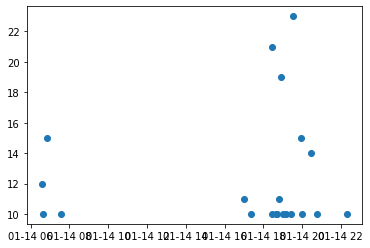

In [71]:
plt.scatter(hasil_filter_t, hasil_filter_ked)

Kode dapat kita sederhanakan dengan menggunakan pengetahuan `dictionary` seperti pada contoh awal. Peserta dapat berlatih dengan studi kasus ini, yaitu mengubah parameter fungsi dari masing-masing kolom menjadi satu `dictionary` saja.

### Menyimpan Fungsi ke Dalam Sebuah Modul

Fungsi `filter_katalog_waktu` di atas salinlah ke dalam folder `utilities` yang berada satu level dengan notebook ini ke dalam file dengan nama `filter_katalog.py`. Pada folder `utilities` tersebut, buatlah satu file lagi dengan nama `__init__.py` (file kosong) sebagai penanda untuk Python bahwa folder tersebut merupakan sebuah modul. Susunannya kira-kira adalah seperti ini:

```
|folder_utama/
|-|utilites/
|-|-|__init__.py
|-|-|filter_katalog.py
|-|2_Materi_Dasar_Python.ipynb
```

Setelah itu kita dapat memanggil fungsi kita layaknya modul-modul yang sudah kita gunakan sebelumnya:

In [74]:
from utilities.filter_katalog import filter_katalog_waktu

help(filter_katalog_waktu)

Help on function filter_katalog_waktu in module utilities.filter_katalog:

filter_katalog_waktu(waktu_awal, waktu_akhir, waktu, longitude, latitude, kedalaman, magnitudo)
    Fungsi untuk memfilter katalog berdasarkan waktu
    
    Parameters:
    waktu_awal : datetime.datetime
        Waktu awal untuk proses filter
    waktu_akhir : datetime.datetime
        Waktu akhir untuk proses filter
    waktu : list
        List yang berisi waktu kejadian
    longitude : list
        List yang berisi longitude
    latitude : list
        List yang berisi latitude
    kedalaman : list
        List yang berisi kedalaman
    magnitudo : list
        List yang berisi magnitudo
    
        
    Returns:
    waktu_hasil_filter : list
        List yang berisi waktu kejadian hasil filter
    longitude_hasil_filter : list
        List yang berisi longitude hasil filter
    latitude_hasil_filter : list
        List yang berisi latitude hasil filter
    kedalaman_hasil_filter : list
        List yang be

## Visualisasi Data

Visualisasi data di Python biasa dilakukan dengan menggunakan modul `matplotlib`, modul ini yang paling umum dan sebenarnya masih banya modul visualisasi data yang lain. Setelah ditahap sebelumnya kita sudah mengolah dan mencoba mengaplikasikan beberapa algoritma umum Python, pada tahap ini kita akan memvisualisasikan data-data yang telah kita baca. Proses plotting para `matplotlib` dilakukan menggunakan fungsi `pyplot`, fungsi ini akan kita impor kemudian kita beri alias sebagai `plt`.

In [75]:
import matplotlib.pyplot as plt
%matplotlib inline

### Plot sederhana
Fungsi paling sederhana dan mudah adalah dengan langsung melakukan plot menggunakan `plt` ini:

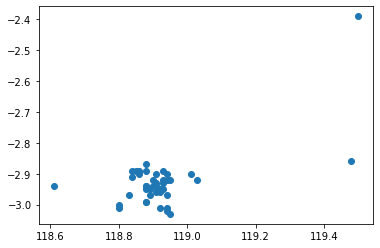

In [76]:
plt.scatter(longitude, latitude)

Fungsi `plt.scatter` seperti di atas akan mengeplot data menjadi titik-titik/*scatter*. Fungsi untuk mengeplot garis adalah `plt.plot`:

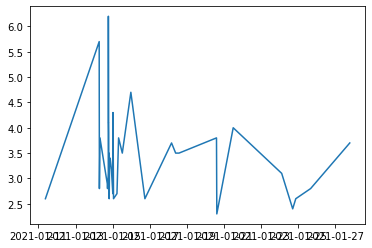

In [77]:
plt.plot(waktu, magnitudo)

Masih banyak sekali bentuk-bentuk plot yang dapat dilihat secara lebih lengkap di website [matplotlib](https://matplotlib.org/).

### Menambah komponen plot
 Komponen-komponen grafik dapat kita tambahkan dengan beberapa fungsi di bawah ini:


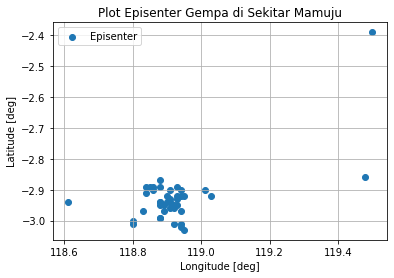

In [78]:
# mengeplot (ditambah label)
plt.scatter(longitude, latitude, label="Episenter")

# menambah keterangan sumbu x dan y
plt.xlabel("Longitude [deg]")
plt.ylabel("Latitude [deg]")

# menambah judul plot
plt.title("Plot Episenter Gempa di Sekitar Mamuju")

# menambah garis grid
plt.grid()

# menampilkan legenda
plt.legend()

### Menyimpan plot
Untuk menambahkan menyimpan gambar kita dapat menggunakan fungsi `plt.savefig` diikuti dengan `lokasi` output dan `dpi` yang merupakan resolusi dalam *dot per inch*, contoh gambar di atas akan kita simpan di folder `output` (folder ini harus sudah dibuat terlebih dahulu).

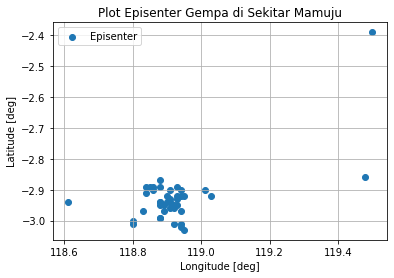

In [80]:
# mengeplot (ditambah label)
plt.scatter(longitude, latitude, label="Episenter")

# menambah keterangan sumbu x dan y
plt.xlabel("Longitude [deg]")
plt.ylabel("Latitude [deg]")

# menambah judul plot
plt.title("Plot Episenter Gempa di Sekitar Mamuju")

# menambah garis grid
plt.grid()

# menampilkan legenda
plt.legend()

# menyimpan ke folder output dengan nama episenter.png
plt.savefig("output/episenter.png", dpi=144)

### Memanfaatkan `format` string untuk keterangan-keterangan plot
Teman-teman kemudian dapat mengecek ke folder `output` untuk melihat gambar dalam ukuran yang asli. Kita juga dapat menggunakan `format` string untuk memberikan judul yang mengandung variabel tertentu. Pada contoh di bawah ini kita memberikan keterangan waktu pada judul grafik dengan menggunakan `format` dan `{}` sebagai *placeholder*. Variabel yang dimasukkan adalah waktu awal `waktu[-1]` dan waktu akhir `waktu[0]` yang dikonversi ke dalam tanggal saja dengan metode `date()`.

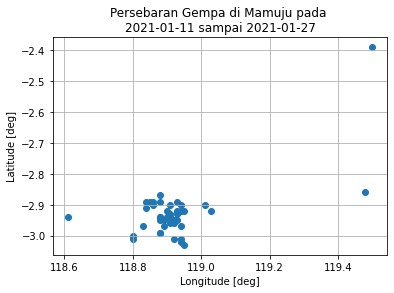

In [81]:
plt.scatter(longitude, latitude) # mengplot titik episenter
plt.xlabel("Longitude [deg]") #menambah label pada sumbu x

plt.ylabel("Latitude [deg]") # menambah label pada sumbu y
plt.title("Persebaran Gempa di Mamuju pada \n" + \
         "{} sampai {}".format(waktu[-1].date(), waktu[0].date())) #keterangan waktu pada judul
plt.grid()

### Mengubah warna dan ukuran plot
Kita dapat melengkapi warna dan ukuran titik episenter sesuai dengan magnitudo dan kedalaman dengan menambahkan argumen `c` yang berarti `color` ke dalam fungsi `plt.scatter`, argumen `c` ini akan kita isi dengan kedalaman karena kita akan mewarnai berdasarkan kedalaman. Argumen `s` mewakili ukuran titik, akan kita isi dengan magnitudo yang mewakili ukuran titik. Pada akhir kode kita dapat menambahkan `plt.colorbar` untuk menampilkan skala warna.

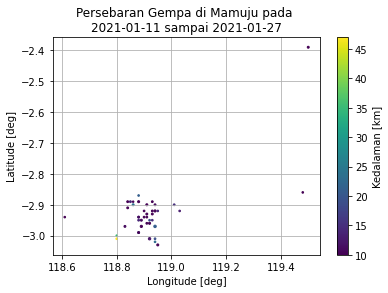

In [82]:
plt.scatter(longitude, latitude, c=kedalaman, s=magnitudo) # mengplot titik episenter
plt.xlabel("Longitude [deg]") #menambah label pada sumbu x
plt.ylabel("Latitude [deg]") # menambah label pada sumbu y
plt.title("Persebaran Gempa di Mamuju pada \n" + \
         "{} sampai {}".format(waktu[-1].date(), waktu[0].date())) #keterangan waktu pada judul
plt.grid()
plt.colorbar(label="Kedalaman [km]")

### Mengubah Ukuran Titik dan Menambahkan Legenda Magnitudo

Ternyata ukuran magnitudo sangat kecil kita dapat memodifikasi nilai magnitudo dengan dikalikan dengan nilai tertentu menggunakan loop. Looping yang akan kita gunakan merupakan looping yang sama hanya saja ditulis dengan lebih singkat. Angka magnitudo akan dikalikan pangkatkan ke 2,5 untuk memperbesar ukuran plot, kemudian pada argumen `s` di `plt.scatter` kita harus mengganti menjadi `magnitudo_modifikasi`. Modifikasi lain juga harus kita berikan, `plt.scatter` harus kita beri nama seperti `eq` kemudian kita harus menambahkan `*eq.legend_elements("sizes", num=4, func=lambda x: x**(1/2.5))` di bagian `plt.legend`. `num` dapat kita ganti dengan berapa jumlah legenda ukuran titik yang akan ditampilkan, sedangkan `func` berisi fungsi untuk mengembalikan angka magnitudo ke angka sebenarnya (kita bagi 6 (`lambda x: x**(1/2.5)`)).

In [83]:
magnitudo_modifikasi = [mag**2.5 for mag in magnitudo]
magnitudo_modifikasi

[26.333240780428074,
 13.118829216054303,
 10.90017247569964,
 8.923353629661888,
 16.920151004054308,
 32.0,
 8.022682219806539,
 28.148742067808286,
 22.91765149399039,
 22.91765149399039,
 26.333240780428074,
 10.90017247569964,
 21.315586785261154,
 47.889978805591475,
 22.91765149399039,
 28.148742067808286,
 11.978692332637985,
 10.90017247569964,
 38.34168006230295,
 11.978692332637985,
 18.31786887167828,
 21.315586785261154,
 21.315586785261154,
 18.31786887167828,
 18.31786887167828,
 10.90017247569964,
 18.31786887167828,
 22.91765149399039,
 16.920151004054308,
 15.588457268119896,
 30.03734325801801,
 34.037655765343175,
 34.037655765343175,
 95.71482810933738,
 16.920151004054308,
 13.118829216054303,
 14.321713933744102,
 28.148742067808286,
 13.118829216054303,
 53.14840063444996,
 77.56881183826397,
 10.90017247569964]

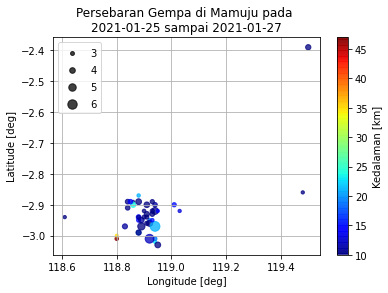

In [78]:
import numpy as np
eq = plt.scatter(longitude, latitude, c=kedalaman, s=magnitudo_modifikasi, label="Episenter", cmap="jet", alpha=.75) # mengplot titik episenter
plt.xlabel("Longitude [deg]") #menambah label pada sumbu x
plt.ylabel("Latitude [deg]") # menambah label pada sumbu y
plt.title("Persebaran Gempa di Mamuju pada \n" + \
         "{} sampai {}".format(waktu[1].date(), waktu[0].date())) #keterangan waktu pada judul
plt.grid()
plt.colorbar(label="Kedalaman [km]")
plt.legend(*eq.legend_elements("sizes", num=4, func=lambda x: x**(1/2.5)))

Fungsi dan kode pada contoh di bawah ini terlihat lebih kompleks, tetapi kita sebenarnya hanya perlu berkonsentrasi pada:

```python
ax.set_extent([118.5, 119.2, -3.25, -2.65])
```

yang menjelaskan batas plot dalam derajat.


```python
eq = ax.scatter(longitude, latitude, zorder=12, s=magnitudo_modifikasi, c=kedalaman\
               ,cmap="jet", alpha=.6)

fig.colorbar(eq, label="Kedalaman [km]")

plt.title("Persebaran Gempa di Mamuju pada \n" + \
         "{} sampai {}".format(waktu[1].date(), waktu[0].date())) #keterangan waktu pada judul
```

menjelaskan plot dari data katalog kita, dan

```python
plt.legend(title="Magnitude", loc="lower left", \
           *eq.legend_elements("sizes", num=4, func=lambda x: x**(1/2.5))).set_zorder(102)
plt.savefig("output/gempa_dem.png", dpi=300)
```

judul plot dan lokasi penyimpanan output.


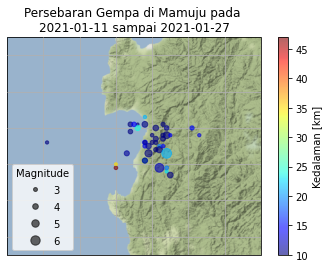

In [86]:
import numpy as np
import cartopy.crs as ccrs
from cartopy.io import srtm
import matplotlib.pyplot as plt
import cartopy.io.img_tiles as cimgt
import cartopy.feature as cfeature


fig = plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())


# Add stamen background
stamen_terrain = cimgt.Stamen('terrain-background') ##maps.stamen.com
ax.add_image(stamen_terrain,10)


# This data is high resolution, so pick a small area which has some
# interesting orography.
ax.set_extent([118.5, 119.2, -3.25, -2.65])
ax.set_xlabel("Longitude [deg]")
ax.set_ylabel("Latitude [deg]")

#add eq
eq = ax.scatter(longitude, latitude, zorder=12, s=magnitudo_modifikasi, c=kedalaman\
               ,cmap="jet", alpha=.6)

fig.colorbar(eq, label="Kedalaman [km]")

plt.title("Persebaran Gempa di Mamuju pada \n" + \
         "{} sampai {}".format(waktu[-1].date(), waktu[0].date())) #keterangan waktu pada judul

gl = ax.gridlines(draw_labels=True, dms=False, x_inline=False, y_inline=False, zorder=11)

gl.xlabels_top = False
gl.ylabels_right = False

plt.legend(title="Magnitude", loc="lower left", \
           *eq.legend_elements("sizes", num=4, func=lambda x: x**(1/2.5))).set_zorder(102)
plt.savefig("output/gempa_peta.png", dpi=300)